> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> ‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# show how many rows and columns
df.shape

(110527, 14)

In [4]:
#sum all null values in df for all columns
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# show information about df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# count the number of unique patient and appointment IDs
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

In [7]:
# show the description of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Create New Dataframe of No-show appointments and convert Types of some fields, rename columns and etc..!)

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [9]:
#copy df content into new_df to start my clean and save the original data as it is
new_df = df.copy()

In [10]:
#show the type of all fields inside new_df
new_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [11]:
# show the first rows of the new_df
new_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# rename the columns name to become expressive names and add underscore insteade of capitalized 
new_df.rename(columns={'No-show':'patient_attended', 'PatientId':'patient_id', 'AppointmentID':'appointment_id',
                       'Gender':'gender', 'ScheduledDay':'scheduled_day', 'AppointmentDay': 'appointment_day',
                       'Age': 'age', 'Neighbourhood': 'hospital_district', 'Scholarship':'scholarship',
                       'Hipertension':'hipertension', 'Diabetes': 'diabetes','SMS_received': 'sms_received',
                       'Handcap':'handcap', 'Alcoholism': 'alcoholism'}, inplace=True)

In [13]:
# convert type of scheduled_day, appointment_day from object to datetime
new_df['scheduled_day'] = pd.to_datetime(new_df['scheduled_day'], format='%Y-%m-%d %H:%M:%S')
new_df['appointment_day'] = pd.to_datetime(new_df['appointment_day'], format='%Y-%m-%d %H:%M:%S')

In [14]:
# extract month from the appointment_day and add it in new column "month_of_appointment"
new_df["month_of_appointment"] = new_df["appointment_day"].dt.month

In [15]:
# extract month from the scheduled_day and add it in new column "month_of_scheduled"
new_df["month_of_scheduled"] = new_df["scheduled_day"].dt.month

In [16]:
# show the informantion of the new_df to insure that my change is done successfully
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   patient_id            110527 non-null  float64            
 1   appointment_id        110527 non-null  int64              
 2   gender                110527 non-null  object             
 3   scheduled_day         110527 non-null  datetime64[ns, UTC]
 4   appointment_day       110527 non-null  datetime64[ns, UTC]
 5   age                   110527 non-null  int64              
 6   hospital_district     110527 non-null  object             
 7   scholarship           110527 non-null  int64              
 8   hipertension          110527 non-null  int64              
 9   diabetes              110527 non-null  int64              
 10  alcoholism            110527 non-null  int64              
 11  handcap               110527 non-null  int64        

In [17]:
# show the first rows of new_df after made my updates
new_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,hospital_district,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,patient_attended,month_of_appointment,month_of_scheduled
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [18]:
# get the total of rows has No words
no = new_df.loc[new_df['patient_attended'] == 'No'].shape[0]

In [19]:
# get the total of rows has Yes words
yes = new_df.loc[new_df['patient_attended'] == 'Yes'].shape[0]

In [20]:
# check if rows of the sum of no and yes variable is = the number of rows of df
# this check to make sure there is no any other word inserted in this fields with wrong data
np.sum([no, yes]) == new_df.shape[0]

True

In [21]:
# replace the value of patient_atteded to be more readable after 
# I change the name of column from No-Show to patient_attended
new_df["patient_attended"].replace({"Yes": False, "No": True}, inplace=True)

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: alcoholism, Length: 110527, dtype: bool

In [25]:
# replace the value of gender to be more readable change m to male, f to female
new_df.gender.replace({"M": "Male", "F": "Female"}, inplace=True)
# replace all the values of the following code to become more readable change 0 to false, 1 to true
replaced_value = {0: False, 1: True}
new_df.replace(
    {
        "alcoholism": replaced_value,"scholarship": replaced_value, 
        "hipertension": replaced_value, "diabetes": replaced_value,
        "sms_received": replaced_value, "handcap": replaced_value
    }, inplace=True)


In [26]:
# show again the information of new_df to make chare changes is done
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   patient_id            110527 non-null  float64            
 1   appointment_id        110527 non-null  int64              
 2   gender                110527 non-null  object             
 3   scheduled_day         110527 non-null  datetime64[ns, UTC]
 4   appointment_day       110527 non-null  datetime64[ns, UTC]
 5   age                   110527 non-null  int64              
 6   hospital_district     110527 non-null  object             
 7   scholarship           110527 non-null  bool               
 8   hipertension          110527 non-null  bool               
 9   diabetes              110527 non-null  bool               
 10  alcoholism            110527 non-null  bool               
 11  handcap               110527 non-null  object       

In [27]:
# drop the row that contain age with -1 because it is not correct there is no age start from -1
new_df.drop(new_df[(new_df.age < 0)].index, inplace = True)

In [28]:
# count the total of patient age groupby age
new_df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [29]:
# show the describtion after drop age row contain -1
new_df.describe()

,patient_id,appointment_id,age,month_of_appointment,month_of_scheduled
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,5.210041,4.823860
std,2.560943e+14,7.129544e+04,23.110026,0.473776,0.715795
min,3.921784e+04,5.030230e+06,0.000000,4.000000,1.000000
25%,4.172536e+12,5.640285e+06,18.000000,5.000000,4.000000
50%,3.173184e+13,5.680572e+06,37.000000,5.000000,5.000000
75%,9.438963e+13,5.725523e+06,55.000000,5.000000,5.000000
max,9.999816e+14,5.790484e+06,115.000000,6.000000,12.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:
> **What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

Text(0.5, 1.0, 'Patient Received sms')

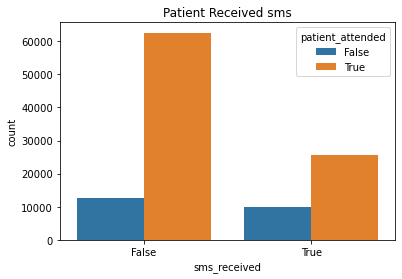

In [30]:
# here we will show the relation between patient attended 
# and the patient received the sms remainder message to attend
sms = sns.countplot(x = 'sms_received',hue = 'patient_attended',data = new_df)
sms.set_title('Patient Received sms')

Text(0.5, 1.0, 'Type of Patient Who Received sms')

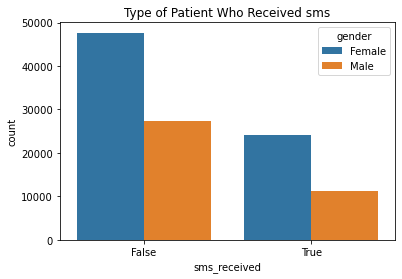

In [31]:
sms = sns.countplot(x = 'sms_received',hue = 'gender',data = new_df)
sms.set_title('Type of Patient Who Received sms')

Text(0.5, 1.0, 'Month Patient Attend and Registered to Attend')

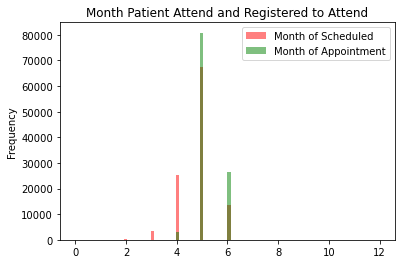

In [43]:
#show the histogram of month patient attend and registered to attend
new_df.month_of_scheduled.plot.hist(range = (0,12),bins = 100, alpha=0.5, color='r')
new_df.month_of_appointment.plot.hist(range = (0,12),bins = 100, alpha=0.5, color='g')
plt.legend(['Month of Scheduled','Month of Appointment'])
plt.title('Month Patient Attend and Registered to Attend')

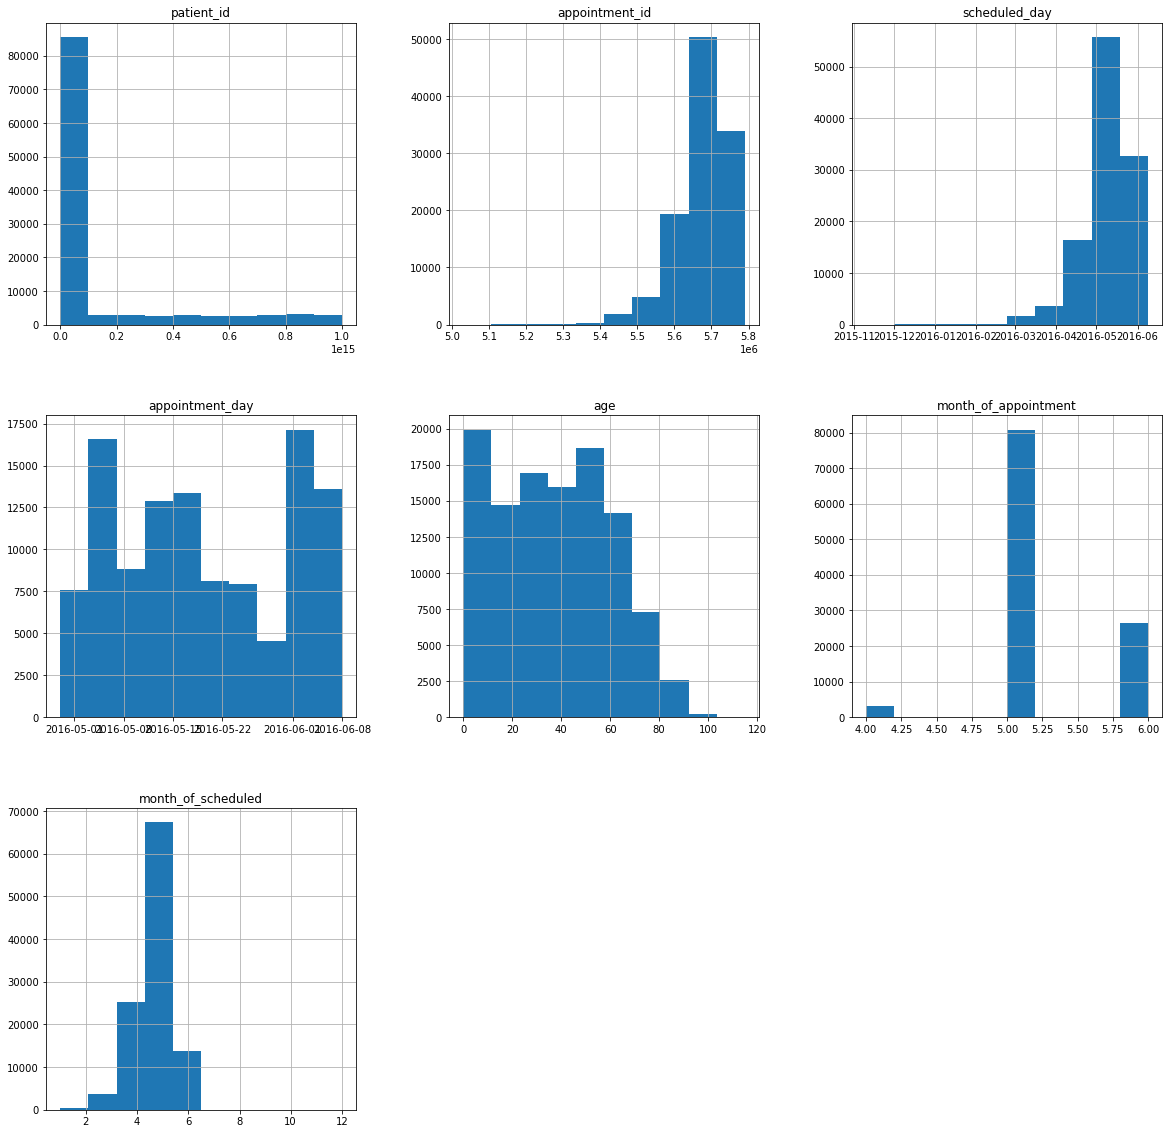

In [174]:
new_df.hist(figsize=(20,20));

### Research Question 2:
> **What is the range of Patients age?**

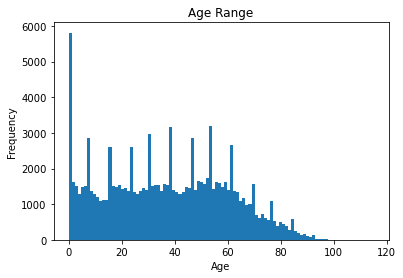

In [33]:
# draw a histogram to show the range of patient age that is more popular and I made the range [0:115]
# because the data contains age until 115
new_df.age.plot(kind = "hist",bins = 100,range = (0,115)) 
plt.title('Age Range')
plt.xlabel('Age')
plt.show() 

### Research Question 3
>**What is the Top Hospital District that has many Patients registered or attend to hospital?**

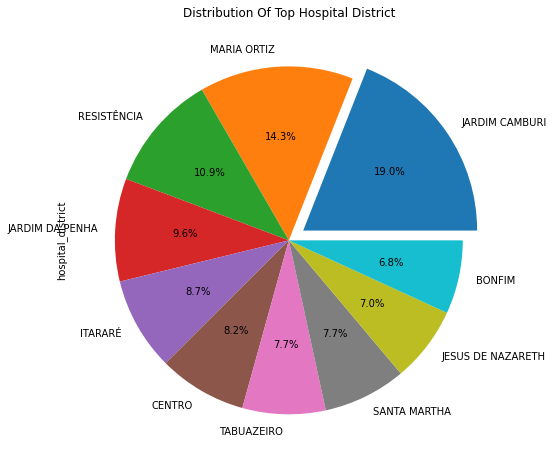

In [34]:
# draw a pie to show which of Hospital District has  alot of patient attend ot register and will attend
plt.subplots(figsize=(8,8))
new_df['hospital_district'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%',explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.title('Distribution Of Top Hospital District')
plt.show()

### Research Question 4:
>**Who is more visit hospital more male/female?**

Text(0.5, 1.0, 'Gender Type')

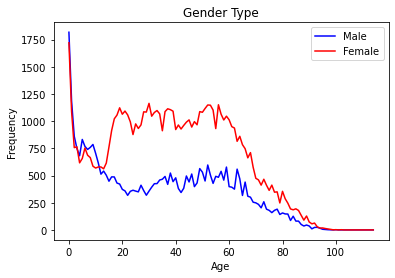

In [38]:
# draw plot to show patient types depend on age and geneder
range_df = pd.DataFrame()
range_df['age'] = range(115)
female = range_df.age.apply(lambda x:len(new_df[(new_df.age == x) & (new_df.gender == 'Female')]))
male = range_df.age.apply(lambda x:len(new_df[(new_df.age == x) & (new_df.gender == 'Male')]))
plt.plot(range(115), male, color = 'b', label= 'Male')
plt.plot(range(115), female, color = 'r', label= 'Female')
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender Type')

Text(0.5, 1.0, 'Patient attended')

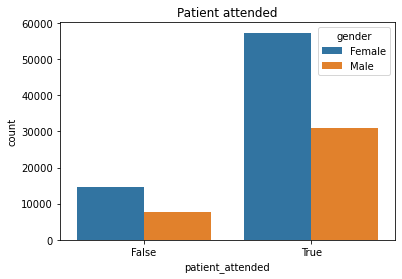

In [39]:
# show the relation between the gender and attended
patient_attended= sns.countplot(x = 'patient_attended',hue = 'gender',data = new_df)
patient_attended.set_title('Patient attended')

### Question 5: 
> **Check Which are more prone to diabetes and hypertension, women or men?**

Text(0.5, 1.0, 'Diabetes')

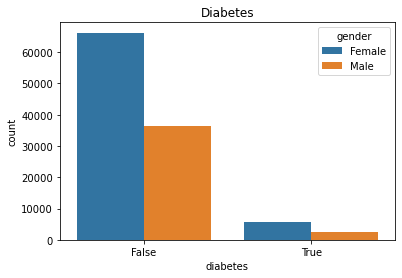

In [44]:
diabetes = sns.countplot(x = 'diabetes',hue = 'gender',data = new_df)
diabetes.set_title('Diabetes')

Text(0.5, 1.0, 'Hipertension')

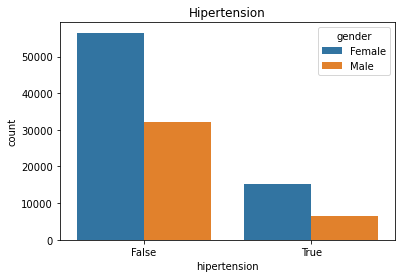

In [45]:
hipertension = sns.countplot(x = 'hipertension',hue = 'gender',data = new_df)
hipertension.set_title('Hipertension')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Conclusions
> **After Cleaning the Data I notice that:**

> **1.Female visit hospital more than Male. We notice that in answering the Q4 
in figures Gender Type / Patient attended**

> **2.patient who receives sms attended more than patient not received sms. We notice that in answering the Q1 in figure Patient Received sms and we notice that Female received sms more than mens in figure Type of Patient Who Received sms**

> **3.Female suffer from diabetes and hipertension more than Men. We notice that in answering the Q5 in figure Diabetes and Hipertension**

> **4.the range of patient age who attending the hospital between 20 and 60 years old. We notice that in answering the Q2 in figure Age Range**

> **5.The address of the top hospital that patient go to there is in the JARDIM CAMBURI that means may be there is a pollution or it is a poor neighborhood. We notice that in answering the Q3 in figure Distribution Of Top Hospital District**

> **6. top month that patient attend to hospital is in May. we notice that in Q1 in figure Month Patient Attend and Registered to Attend**

### Limitation
> **I am not replaced the values or the columns names in the orignal dataframes**
> **I create new data frame and make my changes inside it and drop rows which contains age < 0**
> **my analysis deals with these columns: sms_received, patient_attended, age, gender, Diabetes and Hipertension, hospital_district**

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1